# COVID-19 Interactive Analysis Dashboard

## What is COVID-19?

> Coronaviruses are a large family of viruses that may cause respiratory illnesses in humans ranging from common colds to more severe conditions such as Severe Acute Respiratory Syndrome (SARS) and Middle Eastern Respiratory Syndrome (MERS).1
'Novel coronavirus' is a new, previously unidentified strain of coronavirus. The novel coronavirus involved in the current outbreak has been named SARS-CoV-2 by the World Health Organization (WHO). 3The disease it causes has been named “coronavirus disease 2019” (or “COVID-19”).`

![Coronavirus particle Image](https://www.apta.com/wp-content/uploads/home-banner-1.jpg)

In [1]:
# importing libraries

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import plotly.offline as pyo
#import seaborn as sns
import ipywidgets as widgets



from matplotlib import style
style.use('ggplot')
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
plt.rcParams['figure.figsize'] = 25, 12

pyo.init_notebook_mode(connected=True)
cf.go_offline()


In [2]:
# loading data right from the source:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
df=pd.read_csv(r'https://raw.githubusercontent.com/rahulagarwal01/Covid_19_Datasets/master/Covid%20cases%20in%20India.csv')

In [3]:
# confirmed_df.head()

In [4]:
# recovered_df.head()

In [5]:
# death_df.head()

In [6]:
# country_df.head()

In [7]:
# data cleaning

df.drop(['S. No.'],axis=1,inplace=True)
df['Total Cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']


# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# changing province/state to state and country/region to country
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})
# country_df.head()

# COVID-19 India Stats

In [8]:
# total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

#For India
TOTAL_CASES_OVERALL=df['Total Cases'].sum()
df['Active Cases']=df['Total Cases']-df['Death']-df['Cured']
df.style.background_gradient(cmap='Reds')


,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,895,0,141,27,895,727
1,Chhattisgarh,36,0,28,0,36,8
2,Delhi,2376,1,808,50,2377,1519
3,Gujarat,2624,0,258,112,2624,2254
4,Haryana,272,14,156,3,286,127
5,Himachal Pradesh,40,0,18,1,40,21
6,Karnataka,445,0,145,17,445,283
7,Kerala,440,7,324,3,447,120
8,Madhya Pradesh,1699,0,203,83,1699,1413
9,Maharashtra,6427,3,840,283,6430,5307


# COVID-19 Total Active Cases in India

In [9]:
Total_Active_Cases= df.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()
Total_Active_Cases.style.background_gradient(cmap='Blues')

,Active Cases
Name of State / UT,
Maharashtra,5307
Gujarat,2254
Rajasthan,1707
Delhi,1519
Madhya Pradesh,1413
Uttar Pradesh,1281
Tamil Nadu,911
Telengana,739
Andhra Pradesh,727


# COVID-19 Cases By State Chart in India

In [10]:
#to arrange use object oriented mathub

df.iplot(kind='scatter',x='Name of State / UT' ,y='Total Cases')

In [11]:
df.iplot(kind='scatter',x='Name of State / UT' ,y='Death'
         ,mode='markers+lines',title='My Graph',xTitle='Name of State / UT',yTitle='Death',colors='red',size=20)
px.scatter(df,x='Name of State / UT',y='Cured')

In [12]:
import plotly.graph_objects as go
labels = ['Andhra Pradesh','Chhattisgarh','Delhi','Gujarat','Haryana','Himachal Pradesh','Karnataka','Kerala',
'Madhya Pradesh','Maharashtra','Odisha','Puducherry','Punjab','Rajasthan','Tamil Nadu','Telengana','Chandigarh',
'Jammu and Kashmir','Ladakh','Uttar Pradesh','Uttarakhand','West Bengal','Bihar','Mizoram','Goa','Manipur','Arunchal Pradesh',
'Assam','Tripura', 'Jharkhand','Meghalaya']
values = [27,0,50,112,3,1,17,3,83,283,1,0,16,27,20,24,0,5,0,24,0,20,2,0,0,0,0,1,5,3]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()


In [13]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px; font-weight:bold;font-family:roboto'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;font-weight:bold;font-family:roboto'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;font-weight:bold;font-family:roboto'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

In [14]:
# sorting the values by confirmed descednding order
# country_df.sort_values('confirmed', ascending= False).head(10).style.background_gradient(cmap='copper')
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: purple'
    g = 'background-color: grey'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return country_df.sort_values('confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [15]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)

# Slide to check for the worst hit countries

In [16]:
# # plotting the 20 worst hit countries

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="country", y="confirmed", size="confirmed", color="country",
               hover_name="country", size_max=60)
    fig.update_layout(
    title=str(n) +" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [17]:


def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));
        
    
    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();


# Check the details of your country or the World

* Enter the name of your country(in capitalized format(e.g. Italy)) and world for total cases

In [18]:
interact(plot_cases_of_a_country, country='World')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

# 10 worst hit countries - Confirmed cases

In [19]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "confirmed",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

# 10 worst hit countries - Death cases

In [20]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "deaths",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

# Worst hit countries - Recovering cases

In [21]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "recovered",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

# Global spread of COVID-19

In [22]:

world_map = folium.Map(location=[11,0], tiles="cartodbdark_matter", zoom_start=2, max_zoom = 6, min_zoom = 2)


for i in range(0,len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['lat'], confirmed_df.iloc[i]['long']],
        fill=True,
        radius=(int((np.log(confirmed_df.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='red',
        fill_color='indigo',
        tooltip = "<div style='margin: -20px; background-color: black; color: white;padding-left:10px;padding-top:10px;padding-right:10px;padding-bottom:10px;font-family:roboto'>"+
                    "<h4 style='text-align:center;font-weight: bold;font-family:roboto'>"+confirmed_df.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;font-family:roboto'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px;font-family:roboto'>"+
                        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(world_map)

world_map


In [23]:
df_latlong=pd.merge(sorted_country_df,confirmed_df,on=['country'])

In [24]:
#confirmed_df.head(5)

In [25]:
fig=px.density_mapbox(df_latlong,lat="lat_x",lon="long_",hover_name="country",hover_data=["confirmed","deaths","recovered"],animation_frame='last_update',color_continuous_scale="Portland",radius=7,zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style="carto-darkmatter",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Timeseries Forecasting of COVID-19

In [26]:
# importing necessary modules

from statsmodels.tsa.seasonal import seasonal_decompose 
from pandas import read_csv
from matplotlib import pyplot
# load dataset
series = read_csv('https://raw.githubusercontent.com/rahulagarwal01/Covid_19_Datasets/master/dataset2.csv')
# display first few rows
#print(series.head(20))

In [27]:
series['date'] = pd.DatetimeIndex(series['date'])
#series.dtypes

In [28]:
series = series[series.new_cases != 0]
series.head()

,date,TotalCase,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
30,2020-01-30,1,1,0,0,0.001,0.001,0.0,0.0,NaN,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
33,2020-02-02,2,1,0,0,0.001,0.001,0.0,0.0,NaN,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
35,2020-04-02,3,1,0,0,0.002,0.001,0.0,0.0,NaN,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
63,2020-03-03,5,2,0,0,0.004,0.001,0.0,0.0,NaN,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
64,2020-04-03,6,1,0,0,0.004,0.001,0.0,0.0,NaN,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


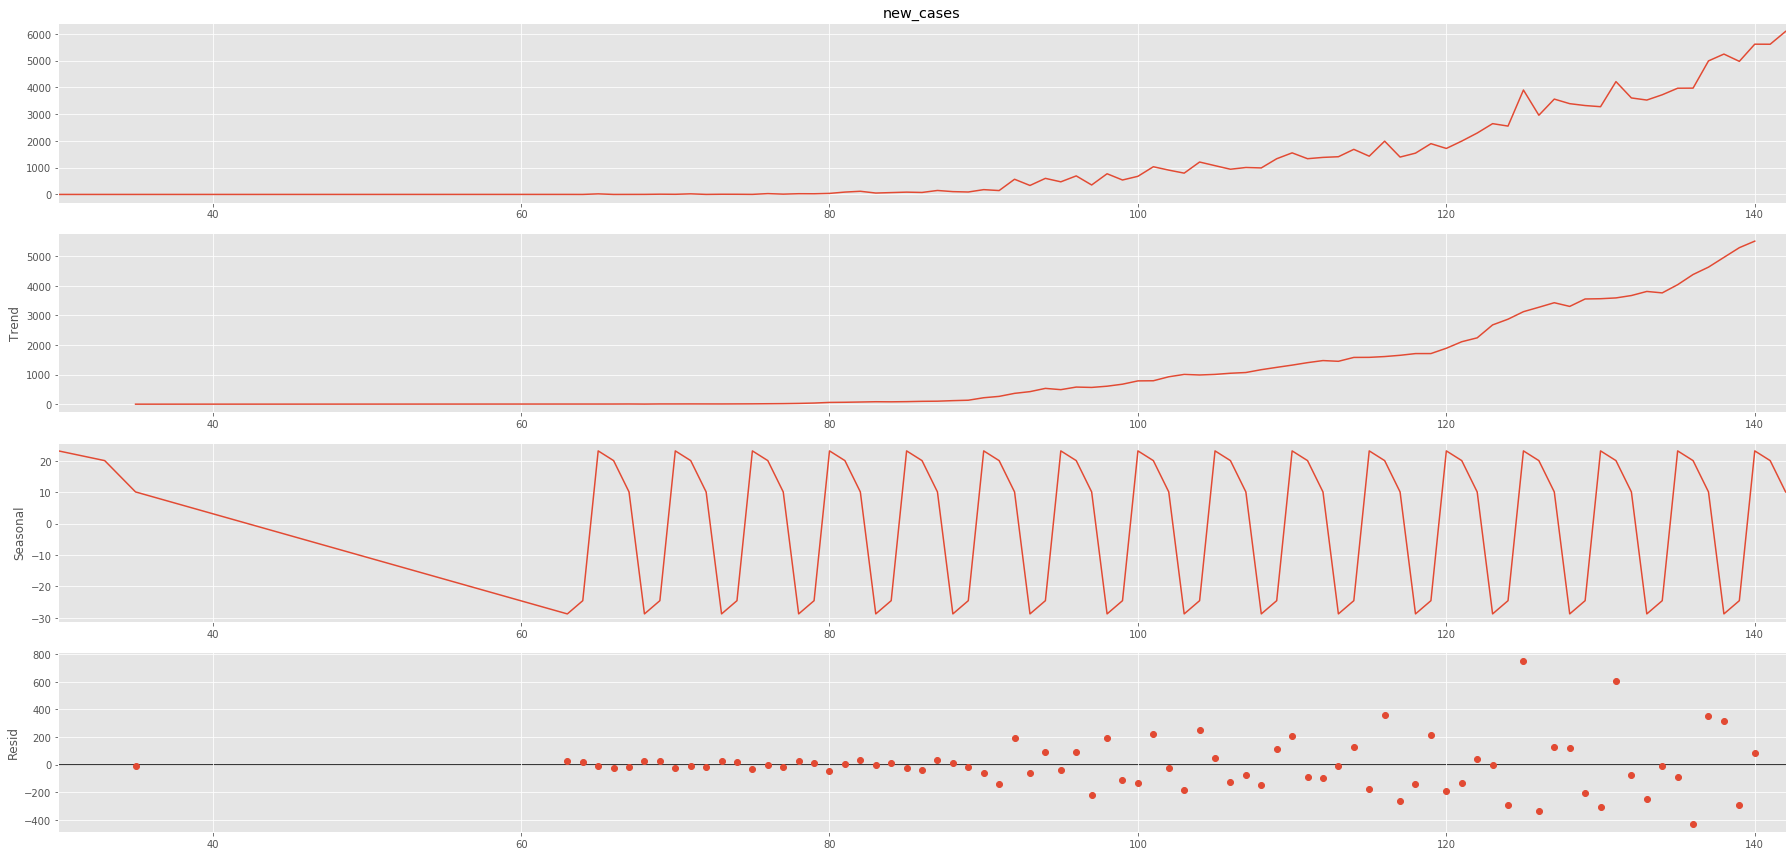

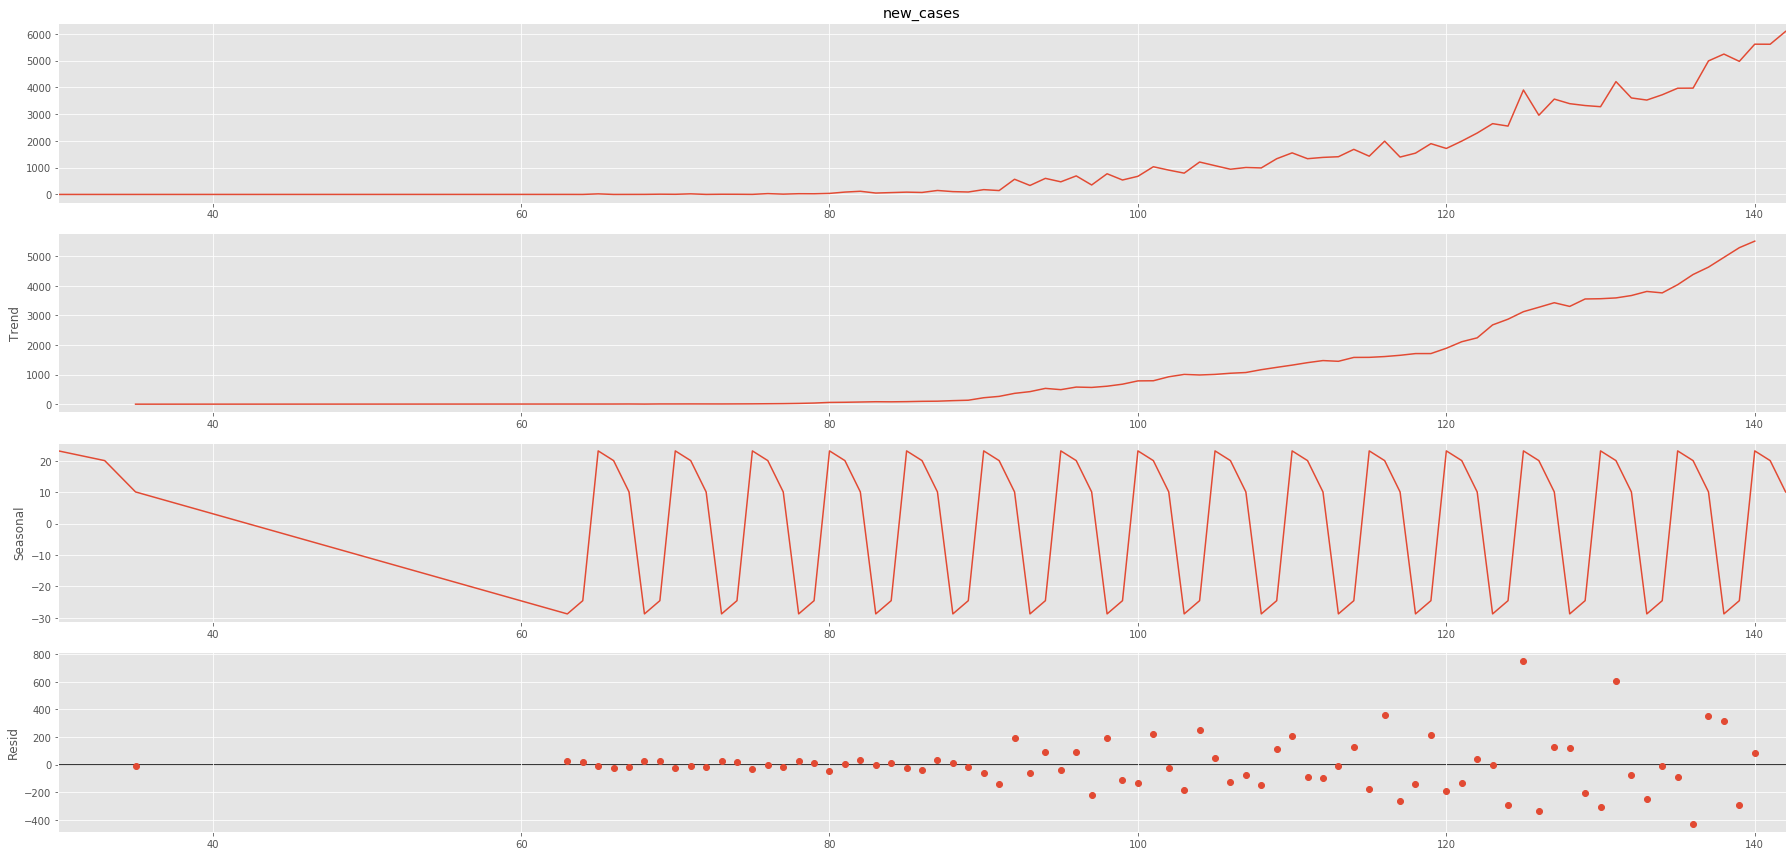

In [29]:
result = seasonal_decompose(series['new_cases'],  
                            model ='additive',period=5) 
  
# ETS plot  
result.plot() 

In [30]:
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(series['new_cases'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 


Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=994.198, BIC=1005.441, Time=0.442 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1043.128, BIC=1047.625, Time=0.014 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=994.243, BIC=1003.237, Time=0.787 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1000.126, BIC=1009.120, Time=0.805 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1041.814, BIC=1044.062, Time=0.012 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=1002.308, BIC=1011.302, Time=0.145 seconds
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=996.184, BIC=1009.675, Time=0.631 seconds
Fit ARIMA(1,1,1)x(0,1,2,12) [intercept=True]; AIC=996.184, BIC=1009.675, Time=0.833 seconds
Fit ARIMA(1,1,1)x(1,1,0,12) [intercept=True]; AIC=994.877, BIC=1006.120, Time=0.607 seconds
Fit ARIMA(1,1,1)x(1,1,2,12) [intercept=True]; AIC=998.187, BIC=1013.926, Time=1.340 seconds
Fit ARIMA(1,1,0)x(0,1,1,12) [int

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   83
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -492.331
Date:                              Wed, 27 May 2020   AIC                            992.661
Time:                                      22:47:00   BIC                           1001.655
Sample:                                           0   HQIC                           996.234
                                               - 83                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     58.1968     19.795      2.940      0.003      19.399      96.994
ar.L1         -0.6145      0.087     -7.055      0.000      -0.785      -0.444
ma.S.L12      -0.5150      0.163     -3.152      0.002      -0.835      -0.195
sigma2      7.156e+04   9406.530      7.607      0.000    5.31e+04       9e+04
===================================================================================
Ljung-Box (Q):                       34.74   Jarque-Bera (JB):                43.85
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):              20.97   Skew:                             1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
train = series.iloc[:len(series)-43] 
test = series.iloc[len(series)-40:] # set one year(12 months) for testing 
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['new_cases'],  
                order = (1, 1, 0),  
                seasonal_order =(0, 1, [1], 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            new_cases   No. Observations:                   40
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -163.390
Date:                              Wed, 27 May 2020   AIC                            332.780
Time:                                      22:47:00   BIC                            336.667
Sample:                                           0   HQIC                           333.936
                                               - 40                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8275      0.136     -6.076      0.000      -1.094      -0.561
ma.S.L12      -0.0714      0.808     -0.088      0.930      -1.654       1.512
sigma2      1.016e+04   1509.147      6.731      0.000    7199.443    1.31e+04
===================================================================================
Ljung-Box (Q):                        8.06   Jarque-Bera (JB):                39.45
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              52.83   Skew:                             1.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

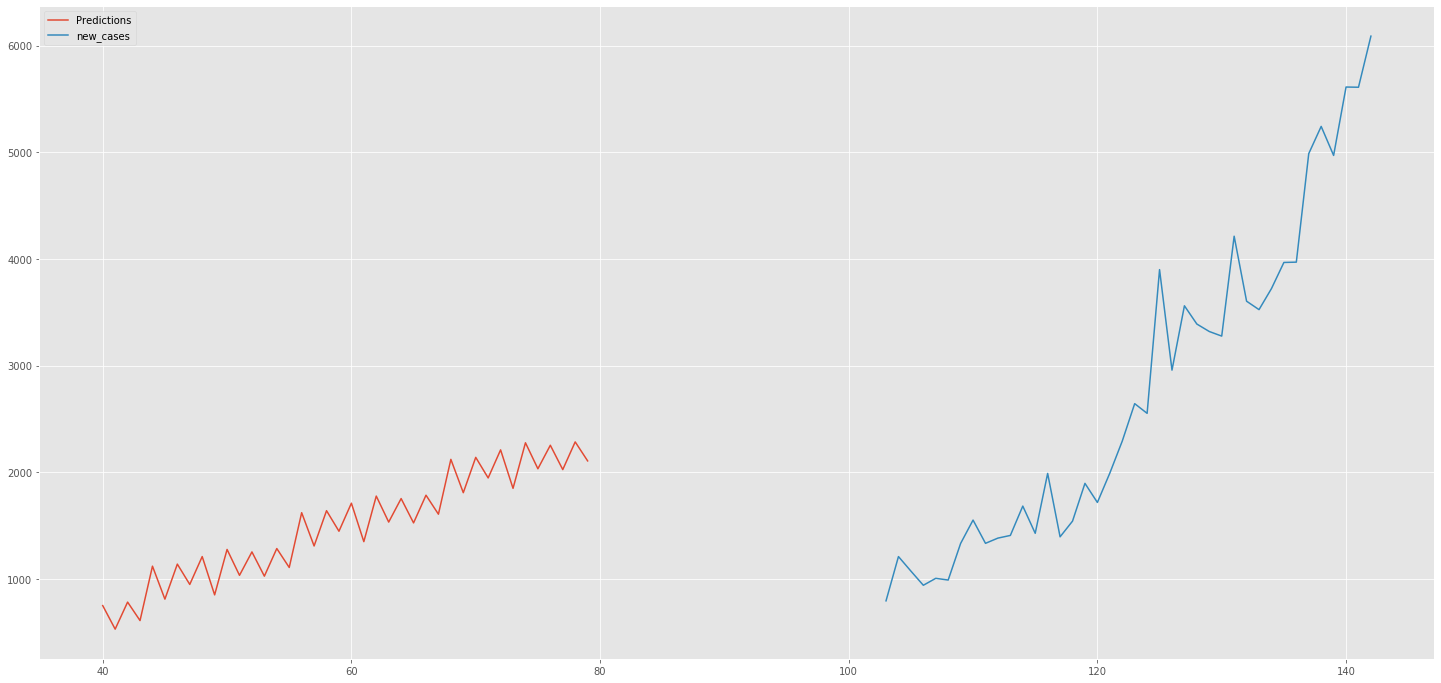

In [32]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['new_cases'].plot(legend = True) 

In [33]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test["new_cases"], predictions) 
  

1656.7143079062396

In [34]:
# Calculate mean squared error 
mean_squared_error(test["new_cases"], predictions)

2744702.2980212504

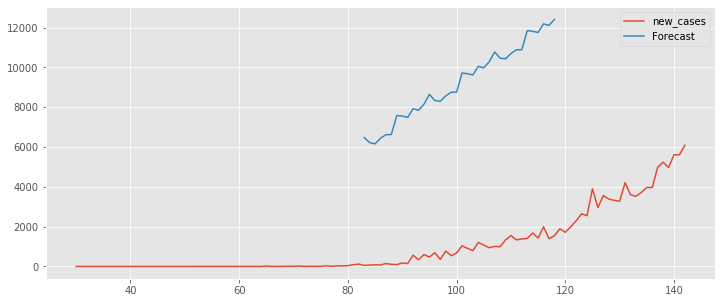

In [35]:
# Train the model on the full dataset 
model = model = SARIMAX(series['new_cases'],  
                        order = (1, 1, 0),  
                        seasonal_order =(0, 1, 1, 12)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(series),  
                          end = (len(series)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
series['new_cases'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

In [36]:
# The button opens links in new tabs *only* once the notebook is rendered to HTML
import IPython.display as display
def open_all_button(links):
    # Set up onclick function
    onclick = "".join(['window.open("{}");'.format(link) for link in links])
    # Create button
    javascript = "element.append('<button onclick=" + onclick +">one click open source docs</button>')"
    return javascript

display.Javascript(open_all_button(["https://www.google.com","https://www.google.co.uk"]))

<IPython.core.display.Javascript object>

In [37]:
from IPython.core.display import display, HTML
display(HTML('<script src="https://www.gstatic.com/dialogflow-console/fast/messenger/bootstrap.js?v=1"></script>'
            '<df-messenger intent="WELCOME" chat-title="covid" agent-id="cd0c7b3a-2672-48de-9a32-412f035e470a" language-code="en"></df-messenger> hi'))